# Codenation ENEM challenge - week 8 

## Importing Packages

In [1]:
#importando pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Setup

%matplotlib inline
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

warnings.filterwarnings('ignore')

## reading train and test datasets

In [2]:
df_train = pd.read_csv('train.csv', index_col = 0)
df_test = pd.read_csv('test.csv', index_col = 0)

# EDA

#### df_train shape

In [3]:
df_train.shape

(13730, 166)

#### df_test shape

In [4]:
df_test.shape

(4576, 46)

We can see that we have more columns for the train dataset than the test dataset.

Let's see which columns are equals for both datasets

In [5]:
# Create column 'train' to identify which line is for train or test
df_train['train'] = True
df_test['train'] = False

columns = list(df_train.columns & df_test.columns)
columns

['CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047',
 'train']

We can see the target variable is not in the list above. for the concat dataframe we have to add it 

### Filtering both datasets with the `columns` variable and add `NU_NOTA_MT` column to the dataset

In [6]:
df_train_filtered = df_train[columns]
df_train_filtered['NU_NOTA_MT'] = df_train['NU_NOTA_MT']

df_test_filtered = df_test[columns]

### Analysing target variable

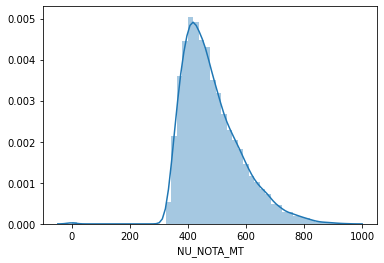

In [7]:
#Analysing NU_NOTA_MT
sns.distplot(df_train_filtered['NU_NOTA_MT'])

We can see that the target variable doesn't follow a normal distribution. the distribution is right skewed.

We need to apply log transformation ont this variable. we can use np.log1p to perform the transformation

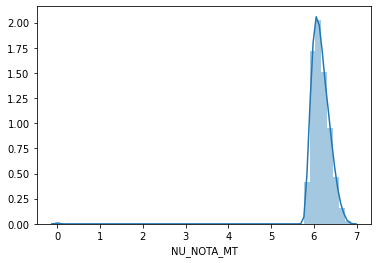

In [8]:
df_train_filtered['NU_NOTA_MT'] = np.log1p(df_train_filtered['NU_NOTA_MT'])
sns.distplot(df_train_filtered['NU_NOTA_MT'])

### Join train and test datasets in order to facilitate the creation and manipulation of features

In [9]:
df = pd.concat([df_train_filtered,df_test_filtered])


### Creating df_aux to help analyse the dataset `df`

In [10]:
#Criando df auxiliar
def auxiliar_df(df):
    df_aux = pd.DataFrame({'columns':df.columns,
                           'type':df.dtypes,
                           'missing':df.isnull().sum(),
                           'size': df.shape[0]})
    df_aux['missing_%']=round(df_aux['missing']/df_aux['size'],2)
    return df_aux
df_aux = auxiliar_df(df)
df_aux

,columns,type,missing,size,missing_%
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,18306,0.00
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,18306,0.00
NU_IDADE,NU_IDADE,int64,0,18306,0.00
TP_SEXO,TP_SEXO,object,0,18306,0.00
TP_COR_RACA,TP_COR_RACA,int64,0,18306,0.00
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,18306,0.00
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,18306,0.00
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,18306,0.00
TP_ESCOLA,TP_ESCOLA,int64,0,18306,0.00
TP_ENSINO,TP_ENSINO,float64,12544,18306,0.69


## Columns to drop

In [11]:
columns_todrop = ['TP_ENSINO',                           # Many missing values  
                  'TP_DEPENDENCIA_ADM_ESC',              # Many missing values 
                  'Q027',                                # Many missing values 
                  'SG_UF_RESIDENCIA']                    # we already have an encode column for this variable
df.drop(columns_todrop,axis=1,inplace=True)

#### Shape of the new df:

In [12]:
df.shape

(18306, 44)

We have some columns for disabled people. We can substituite all these columns with one that summarize whether the person has special needs or not. We can call this column as `PCD`

In [13]:
#Creating PCD feature
df['PCD']= np.int64(df.IN_BAIXA_VISAO | df.IN_SURDEZ | df.IN_DISLEXIA | df.IN_DISCALCULIA)  
df.nunique()

CO_UF_RESIDENCIA       27
NU_IDADE               55
TP_SEXO                 2
TP_COR_RACA             6
TP_NACIONALIDADE        5
TP_ST_CONCLUSAO         4
TP_ANO_CONCLUIU        11
TP_ESCOLA               4
IN_TREINEIRO            2
IN_BAIXA_VISAO          2
IN_CEGUEIRA             1
IN_SURDEZ               2
IN_DISLEXIA             2
IN_DISCALCULIA          2
IN_SABATISTA            2
IN_GESTANTE             2
IN_IDOSO                2
TP_PRESENCA_CN          3
TP_PRESENCA_CH          3
TP_PRESENCA_LC          3
CO_PROVA_CN            10
CO_PROVA_CH            10
CO_PROVA_LC             9
CO_PROVA_MT             9
NU_NOTA_CN           2872
NU_NOTA_CH           3193
NU_NOTA_LC           2939
TP_LINGUA               2
TP_STATUS_REDACAO       9
NU_NOTA_COMP1          15
NU_NOTA_COMP2          13
NU_NOTA_COMP3          12
NU_NOTA_COMP4          14
NU_NOTA_COMP5          14
NU_NOTA_REDACAO        53
Q001                    8
Q002                    8
Q006                   17
Q024        

As we created the column PCD we can remove the columns IN_BAIXA_VISAO, IN_SURDEZ, IN_DISLEXIA, IN_DISCALCULIA.
Accourding to the table above, IN_CEGUEIRA has just one unique value, hence we can drop it as well.

In [14]:
df.drop(['IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA','IN_CEGUEIRA'],axis=1,inplace=True)
df.drop(['CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT' ],axis=1,inplace=True)

### Filling null values

In [15]:
cols_to_input= [
    'NU_NOTA_CH', 
    'NU_NOTA_CN',
    'NU_NOTA_LC',
    'NU_NOTA_COMP1', 
    'NU_NOTA_COMP2', 
    'NU_NOTA_COMP3', 
    'NU_NOTA_COMP4', 
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'NU_NOTA_MT',
    'TP_STATUS_REDACAO']

# fill missing values for quantitative features
for feature in cols_to_input:
    df[feature]=df[feature].fillna(0) 
auxiliar_df(df)

,columns,type,missing,size,missing_%
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,18306,0.0
NU_IDADE,NU_IDADE,int64,0,18306,0.0
TP_SEXO,TP_SEXO,object,0,18306,0.0
TP_COR_RACA,TP_COR_RACA,int64,0,18306,0.0
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,18306,0.0
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,18306,0.0
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,18306,0.0
TP_ESCOLA,TP_ESCOLA,int64,0,18306,0.0
IN_TREINEIRO,IN_TREINEIRO,int64,0,18306,0.0
IN_SABATISTA,IN_SABATISTA,int64,0,18306,0.0


In [16]:
df['TP_NACIONALIDADE'].unique()

array([1, 2, 3, 4, 0])

### Encoding features of type `object` using pandas `get_dummies`

In [17]:
col_to_encode = list(df.select_dtypes(include =['O']).columns)

df = pd.get_dummies(df, columns = col_to_encode)


### Let's analyse the column `NU_IDADE`

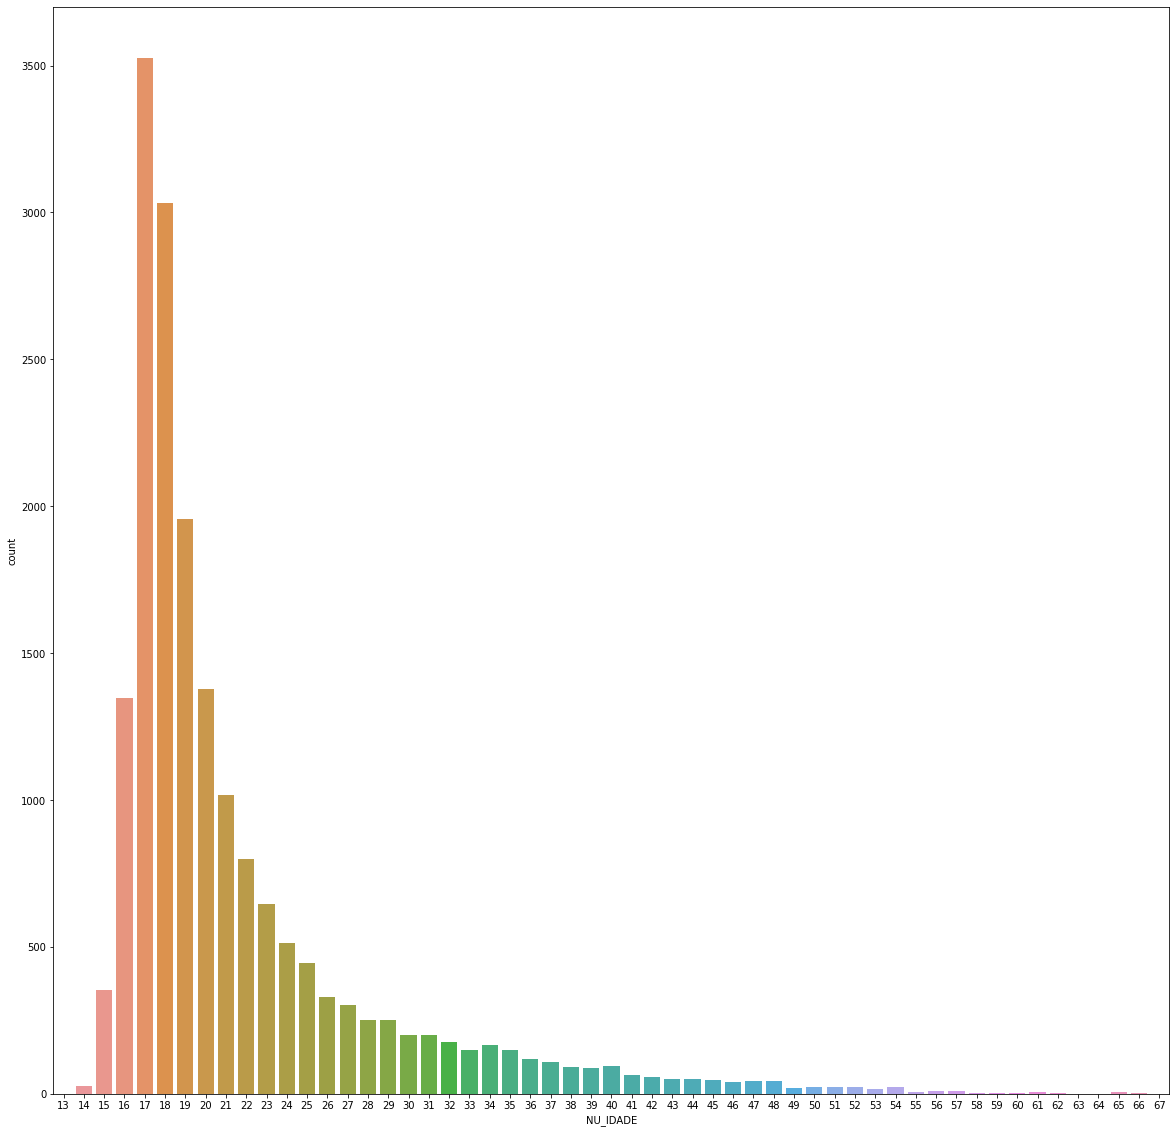

In [18]:
plt.figure(figsize=(20,20))
sns.countplot(x='NU_IDADE', data=df)

We can see some peaks of age concentration to the left, therefore we can create a category column for those ages.

In [19]:
df['TP_IDADE_CATEGORY'] = np.int64(pd.cut(df['NU_IDADE'], bins=[0, 17, 20, 23, 27, 33, 41, 100], labels=range(7)).ravel())
df.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,train,NU_NOTA_MT,PCD,TP_SEXO_F,TP_SEXO_M,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E,TP_IDADE_CATEGORY
1,43,24,1,1,1,4,1,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,True,5.992464,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,3
2,23,17,3,1,2,0,2,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,True,6.132964,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,23,21,3,1,3,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,2
4,33,25,0,1,1,9,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,3
5,13,28,2,1,1,4,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,4


As we created the feature `TP_IDADE_CATEGORY`. We can drop the columns `NU_IDADE` and `IN_IDOSE`

In [20]:
df.drop(['NU_IDADE','IN_IDOSO'], axis=1,inplace=True)

### Encode TP_NACIONALIDADE

1 -> Foreign

0 -> Brazilian

In [21]:
mapping = {1:0,2:0,3:1,4:0,0:0}

df['ESTRANGEIRO']= df['TP_NACIONALIDADE'].map(mapping)
df.drop('TP_NACIONALIDADE',axis=1, inplace=True)


### Let's filter our features of importance

In [22]:
important_features = ['CO_UF_RESIDENCIA','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','IN_TREINEIRO','IN_SABATISTA','IN_GESTANTE','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','train','NU_NOTA_MT','PCD','TP_SEXO_F','TP_SEXO_M','TP_IDADE_CATEGORY','ESTRANGEIRO']

In [23]:
df=df[important_features]

### Split the datase as the original form (`train`, `test`)

In [24]:
X_train = df[df['train']==True]
X_train.drop('train',axis=1,inplace=True)

X_test = df[df['train']==False]
X_test.drop(['NU_NOTA_MT','train'],axis=1,inplace=True)


In [25]:
y_train = X_train['NU_NOTA_MT']
X_train = X_train.drop('NU_NOTA_MT',axis=1)

### Scaling the train and test dataset

In [26]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

### Creating our regression model. I've chosen to do go with a simple regression using the skit-learn `LinearRegression()`

In [27]:
#Instantiate LinearRegression()
reg = LinearRegression()

In [28]:
reg.fit(x_train_scaled,y_train)
y_pred= reg.predict(x_test_scaled)
y_pred = np.expm1(y_pred)


#### Metrics

In [29]:
reg.score(x_train_scaled, y_train)

0.989800482989034

In [30]:
#Creatign answer df
answer = pd.DataFrame({'NU_INSCRICAO':X_test.index,
                       'NU_NOTA_MT': y_pred})
answer.to_csv('answer.csv',index=False)